In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Correlation

Previously we looked at the relationship between ATAR and grade for some student data.

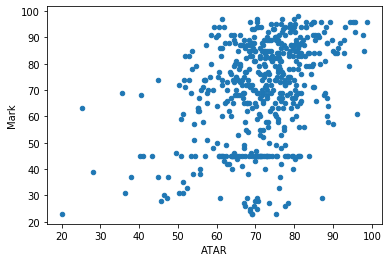

In [2]:
grades = pd.read_csv("files/grades.csv")
# remove zeros
grades = grades.drop(grades.index[(grades.Mark == 0) | (grades.ATAR == 0)])
grades.plot('ATAR', 'Mark', kind='scatter')


(0, 103.20756065686282)

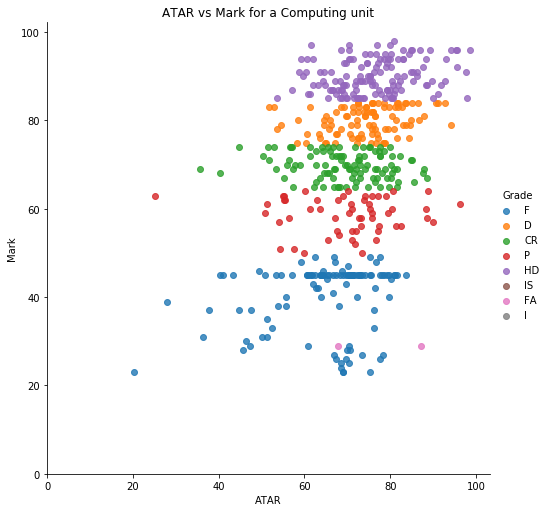

In [3]:
# or plot using seaborn
sns.lmplot(x='ATAR', y='Mark', data=grades, fit_reg=False, hue="Grade", height=7)
plt.title("ATAR vs Mark for a Computing unit")
plt.ylim(0, None)
plt.xlim(0, None)

We can see from the plot that there isn't much of a relationship between these two variables. As ATAR increases, the range of values for Mark doesn't change very much.  

To quantify this we can look at the **covariance** or **correlation** between the two variables.  


## Covariance

- how the two variables vary together, 
- larger values mean that the size of the mutual deviation from the mean is large
- if two variables are totally unrelated, the covariance would be zero.
- but the fact that covariance can be any value makes it hard to interpret:

In [4]:
grades.cov()

,ATAR,Mark
ATAR,122.931200,78.932811
Mark,78.932811,359.535302


The coveriance of the ATAR and Mark however it is hard to tell, we need Correlation

## Correlation

**Correlation** is a normalised version of covariance, standardised to between -1 and 1.  

Much easier to interpret - a value of 1 (or -1) means a perfect relationship between the two variables.  The closer to 1 the better the relationship.  

The correlation of Mark and ATAR is 0.37 which is very low, confirming that there is no real relationship between these variables.

In [5]:
grades.corr()

,ATAR,Mark
ATAR,1.000000,0.373856
Mark,0.373856,1.000000


Base on the outcome above between ATAR and Mark, the corrrelation is only 0.37 which tell these 2 x values do not Correlate much to each other.

Let's look at another dataset that shows a better correlation.  This is the [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) from the UCI archive.

In [6]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


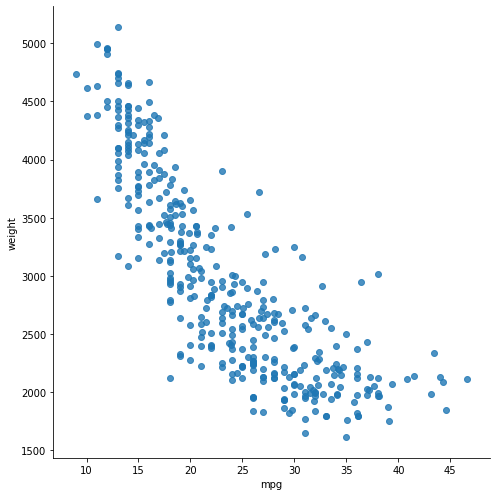

In [7]:
sns.lmplot(x='mpg', y='weight', data=autompg, fit_reg=False, height=7)

We can see from the plot an more obvious negative relationship between *mpg* and *weight* - heavier cars use more fuel. 

The correlation is -0.83 which is close to -1 and shows a high negative correlation.  

In [8]:
autompg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Correlation and Causation

When we look for a correlation between two variables we are often looking to see if we can find evidence for some kind of causal relationship.   Does having a higher ATAR mean that you will are smart and will pass this course? Does adding weight to a car make it use more petrol? 

In this case, we can say definitely not for the first question and *maybe* for the second.

We need to be careful in drawing inferences even when a correlation is observed.  In the example of the cars, the weight may be a factor in using more fuel but we could also look at the size of the engine - bigger engines will weigh more - and other factors that might affect fuel use.  


Here's a discussion [from the Computation and Inferential Thinking text](https://www.inferentialthinking.com/chapters/02/causality-and-experiments.html):

>Observation is a key to good science. An **observational study** is one in which scientists make conclusions based on data that they have observed but had no hand in generating. In data science, many such studies involve observations on a group of individuals, a factor of interest called a **treatment**, and an **outcome** measured on each individual.



>It is easiest to think of the **individuals** as people. In a study of whether chocolate is good for the health, the individuals would indeed be people, the treatment would be **eating chocolate**, and the outcome might be a measure of **blood pressure**. But individuals in observational studies need not be people. In a study of whether the death penalty has a deterrent effect, the individuals could be the **50 states of the union**. A state law **allowing the death penalty** would be the treatment, and an outcome could be the state’s **murder rate**.
    


>The fundamental question is whether the treatment has an effect on the outcome. Any relation between the treatment and the outcome is called an **association**. If the treatment causes the outcome to occur, then the association is **causal**. Causality is at the heart of all three questions posed at the start of this section. For example, one of the questions was whether chocolate directly causes improvements in health, not just whether there there is a relation between chocolate and health.


### Confounding Factors

To establish causality we first need to observe a correlation, but then we need to be sure that this is not due to some **confounding** factor: a variable that we have not measured or understood, that accounts for the association we observe.  

Again from [C&I Thinking](https://www.inferentialthinking.com/chapters/02/3/establishing-causality.html):

>**Example: Coffee and lung cancer.** Studies in the 1960’s showed that coffee drinkers had higher rates of lung cancer than those who did not drink coffee. Because of this, some people identified coffee as a cause of lung cancer. But coffee does not cause lung cancer. The analysis contained a confounding factor – smoking. In those days, coffee drinkers were also likely to have been smokers, and smoking does cause lung cancer. Coffee drinking was associated with lung cancer, but it did not cause the disease.

## Randomisation

One defence against confounding factors in experiments is to select the treatment and control groups at random from a larger population. If we suspect that some other factors may be important, we can ensure that the two groups are balanced for that factor.  For example, we might ensure that there are equal numbers of males and females in each group.  Selecting people at random is a way of doing this.

 

A **blind** randomised trial is one where the members of each group don't know which group they are in. Are they getting a treatment or not? In a medical setting this would involve the use of a **placebo** - it is well known that people will often feel better just because they know they are being treated.



A **double blind** trial is one where the researchers don't know which group people are in either. This prevents any effects where the researcher might unconciously influence the outcome of the experiment.  Obviously in some cases, double blind is not feasible.

## Theory and Explanation

While we can establish an association between a treatment and an outcome, and eliminate as many confounding factors as we understand, we become more convinced of the argument for a causal link if there is also a good theoretical explanation for what is observed.  This might be based on simple Physics (more weight means more fuel) or on a complex biological explanation of a disease phenomenon (smoking causes cancer).  

The theory is strenthened by the observations, but a good theory will also make **predictions** that can be tested in future experiments.  Thinking back to our earlier discussion of the **science** in **data science**: a good theory should be falsifiable, there should be an experiment you can do that if it failed, would disprove the theory.  All of this goes together to give us sound explanations for what we see around us and advance our knowledge.


## Summary

- Correlation is a measure of the association between two variables
- In an experiment, we collect data generally trying to establish a causal relationship 
- Confounding factors can mean that an association is observed when there is no causal link
- To gather evidence for causality, we need more than an observed relationship, we need to exclude confounding factors and to provide some kind of theoretical explanation